# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

***Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavljevic***

## Stage 2: Training Word and Sentence embedding models

In [1]:
# Following are needed packages for stage_2 

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix


from sklearn import svm
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

from gensim.models import Word2Vec


In [2]:
#Loading the dataset

# Setting the path and Loading the data from csv file
from pathlib import Path
print(Path.cwd())

data_folder = Path("dataset/cleaned_data.csv")
data_folder

c:\Users\kokit\OneDrive - Hochschule Luzern\Study Docuemnts\Semester-4\CLT\Project\NLP\Stages\Stage_2


WindowsPath('dataset/cleaned_data.csv')

In [3]:
#reading the data 
df = pd.read_csv(data_folder)
df.head()

,title,date,content,domain,url,cleaned_content_stem,len_content,len_title,cleaned_content,cleaned_title,len_cleaned_content,len_cleaned_title,len_cleaned_,word_counts,doc_length,polarity,word_counts_title,polarity_title
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,qatar petroleum qp target aggress cut greenhou...,2710,50,qatar petroleum qp targeting aggressive cut gr...,qatar slash emission lng expansion advance,1948,42,1948,279,1948,0.035865,6,0.000000
1,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,nuclear power corp india ltd npcil synchron ka...,3410,36,nuclear power corp india ltd npcil synchronize...,india launch first 700 mw phwr,2525,30,2525,349,2525,0.101970,6,0.250000
2,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,new us presid joe biden took offic week uschin...,4331,37,new u president joe biden took office week usc...,new chapter uschina energy trade,3144,32,3144,453,3144,-0.071911,5,0.136364
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,slow pace japanes reactor restart continu cast...,4445,51,slow pace japanese reactor restarts continues ...,japan slow restarts cast doubt 2030 energy plan,3241,47,3241,429,3241,0.003243,8,-0.300000
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,two new york citi largest pension fund say div...,2522,46,two new york city largest pension fund say div...,nyc pension fund divest fossil fuel share,1797,41,1797,246,1797,0.017685,7,0.000000


# Data Preparation for Embeddings

The data is already cleaned and preprocessed in stage 1Instead of training the content, we focused first on titles. Before splitting the data into train and validation sets, we checked the total number of titles.

# Word2Vec on Content

In [4]:
contents = df['cleaned_content']

In [5]:
#tokenizing the text to split into words
tokenized_content = [content.split() for content in contents]

# Splitting the data into training (80%) and validation (20%) sets
train_content, val_content = train_test_split(tokenized_content, test_size=0.2, random_state=42)

# Displaying the first few tokenized titles in the training set
train_content[:1]

[['eu',
  'member',
  'state',
  'committee',
  'level',
  'agreed',
  'comprehensive',
  'reform',
  'renewables',
  'directive',
  'red',
  'hike',
  'bloc',
  'renewable',
  'energy',
  'target',
  'perpetuate',
  'emergency',
  'measure',
  'last',
  'year',
  'speed',
  'planning',
  'permit',
  'renewables',
  'installation',
  'nuclearbased',
  'hydrogen',
  'continue',
  'count',
  'towards',
  'target',
  'green',
  'hydrogen',
  'minor',
  'concession',
  'made',
  'towards',
  'france',
  'friend',
  'atomic',
  'power',
  'eu',
  'ambassador',
  'agreed',
  'binding',
  '2030',
  'target',
  '425',
  'renewables',
  'measured',
  'gross',
  'energy',
  'consumption',
  'previous',
  'goal',
  '32',
  'topup',
  'another',
  '25',
  'supposed',
  'reached',
  'voluntary',
  'contribution',
  'member',
  'state',
  'new',
  'target',
  'mean',
  '100gw',
  'new',
  'wind',
  'solar',
  'capacity',
  'need',
  'installed',
  'eu',
  'year',
  'germany',
  'government',
  'said

In [6]:
# reverting back the words

# defining dictionary for words that need to be transformmed back
word_transform = {
    "u" : "US"
}


In [7]:
# Function to bring the word to the original form

def revert_transformed_words(text, transform_dict):
    for key, value in transform_dict.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)
    return text

# Apply the function to the relevant column
df['reverted_content'] = df['cleaned_content'].apply(lambda x: revert_transformed_words(x, word_transform))

rev_content = df['reverted_content']

In [8]:
#tokenizing the text to split into words
tokenized_content = [content.split() for content in rev_content]

# Splitting the data into training (80%) and validation (20%) sets
train_content, val_content = train_test_split(tokenized_content, test_size=0.2, random_state=42)

# Displaying the first few tokenized titles in the training set
train_content[:1]

[['eu',
  'member',
  'state',
  'committee',
  'level',
  'agreed',
  'comprehensive',
  'reform',
  'renewables',
  'directive',
  'red',
  'hike',
  'bloc',
  'renewable',
  'energy',
  'target',
  'perpetuate',
  'emergency',
  'measure',
  'last',
  'year',
  'speed',
  'planning',
  'permit',
  'renewables',
  'installation',
  'nuclearbased',
  'hydrogen',
  'continue',
  'count',
  'towards',
  'target',
  'green',
  'hydrogen',
  'minor',
  'concession',
  'made',
  'towards',
  'france',
  'friend',
  'atomic',
  'power',
  'eu',
  'ambassador',
  'agreed',
  'binding',
  '2030',
  'target',
  '425',
  'renewables',
  'measured',
  'gross',
  'energy',
  'consumption',
  'previous',
  'goal',
  '32',
  'topup',
  'another',
  '25',
  'supposed',
  'reached',
  'voluntary',
  'contribution',
  'member',
  'state',
  'new',
  'target',
  'mean',
  '100gw',
  'new',
  'wind',
  'solar',
  'capacity',
  'need',
  'installed',
  'eu',
  'year',
  'germany',
  'government',
  'said

# Word2Vec Model


Similar to Word2Vec model on title, now lets apply the model on the content.

In [9]:
# Setting hyperparameters for the Word2Vec model
vector_dimensions = 100  
window_size = 5          
training_epochs = 10     

# Training the Word2Vec model with the specified parameters
word2vec_model_content = Word2Vec(sentences=train_content, 
                                  vector_size=vector_dimensions, 
                                  window=window_size, 
                                  epochs=training_epochs)

# Displaying the Word2Vec model training output
print("Word2Vec Model Training Complete")

# Checking the similarity score for the word 'energy' in the trained model
print("Similarity Score for 'energy':")
similar_words = word2vec_model_content.wv.most_similar('energy')

# Displaying the similar words along with their similarity scores
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


# Word vector

In [11]:
# Checking the word vector for a sample word 'energy'
sample_word = 'energy'

# Check if the sample word is in the model's vocabulary
if sample_word in word2vec_model_content.wv:
    # Retrieve the vector for the sample word
    sample_word_vector = word2vec_model_content.wv[sample_word]
    # Print the vector representation
    print(f"Vector representation for '{sample_word}':\n{sample_word_vector}")
else:
    # Inform the user if the word is not in the vocabulary
    print(f"The word '{sample_word}' is not in the vocabulary.")


Vector representation for 'energy':
[ 0.7648179  -0.40897694  0.85176665  2.4503462  -0.42749584  1.2228664
 -1.0275762   0.362106   -1.8480501   1.384415    1.6436486   1.8369522
 -0.08720696  1.7741269   0.09356169 -0.8607774  -0.1772861   1.4076236
 -2.047135    0.26270232  0.2121673  -2.2252347   0.72746015 -1.9665536
 -0.36291316 -1.8378513   2.2399802   3.028684   -0.5322963   0.75006634
 -0.14779672 -1.8789153   1.1487645  -2.9028416  -0.85090816 -0.8578367
  1.0793325  -0.43573567 -0.7615835   0.05458945 -1.0375394   0.6633756
 -0.34657148  0.23254806 -0.9896162   1.7844111  -2.3945608   1.2369883
  0.25530976  1.2986652  -0.72207236  3.4282334   1.6131697   0.55417776
  1.8463837  -2.3068898  -0.8858179  -1.4472063   2.6694052   2.0683165
  1.2396331   0.09047505  1.3198353  -0.18008374  2.0723064  -0.3879446
  1.3628273  -0.77166665  0.05220504 -2.2702837   2.8913088   0.8776764
 -0.57481784 -1.4617231   0.06427223 -0.28549716  1.4272513  -1.3502343
  1.4995735  -2.3416235   

The output displays the vector representation of the word 'energy' as derived from the Word2Vec model. This vector is a list of numerical values, each representing a dimension in the word's feature space. The model captures the contextual information of 'energy' based on the dataset it was trained on. Hence, each number in the vector contributes to the word's meaning as understood by the model. In applications such as semantic search, similarity detection, or even predictive modeling, these vectors can be used to understand and quantify the relationship between words based on their usage in the text corpus.

In [13]:
import numpy as np
from sklearn.cluster import KMeans

# Define a function to average all word vectors in a given piece of text
def content_average_word_vectors(words, model, vocabulary, num_features):
    # Initialize an empty feature vector
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0

    # Sum up the vectors for all words in the text
    for word in words:
        if word in vocabulary:
            nwords += 1
            feature_vector = np.add(feature_vector, model.wv[word])

    # Divide the result by the number of words to get the average
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    
    return feature_vector

# Prepare the dataset vocabulary set and define the number of features
vocab = set(word2vec_model_content.wv.index_to_key)
num_features = word2vec_model_content.wv.vector_size

# Apply the function to each piece of text in the DataFrame
df['content_avg_word_vec'] = df['cleaned_content'].apply(
    lambda x: content_average_word_vectors(x, word2vec_model_content, vocab, num_features)
)

# Convert the list of vectors into a 2D array for clustering
content_vectors = np.array(df['content_avg_word_vec'].tolist())

# Choose the number of clusters for KMeans
num_clusters = 5

# Perform KMeans clustering
content_kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(content_vectors)

# Add the cluster labels to your dataframe
df['content_cluster'] = content_kmeans.labels_


The content_average_word_vectors function computes the average Word2Vec vector for a list of words by summing their vectors and dividing by the number of words.
The vocab variable is a set containing all the unique words from the Word2Vec model's vocabulary, and num_features is the size of the word vectors.
The DataFrame df is updated with a new column content_avg_word_vec, where each row contains the average vector of its content.
The content_vectors are then prepared for clustering by converting them into a 2D NumPy array.
KMeans clustering is applied to the vectors, creating num_clusters clusters, with the resulting labels added to the DataFrame as a new column content_cluster.

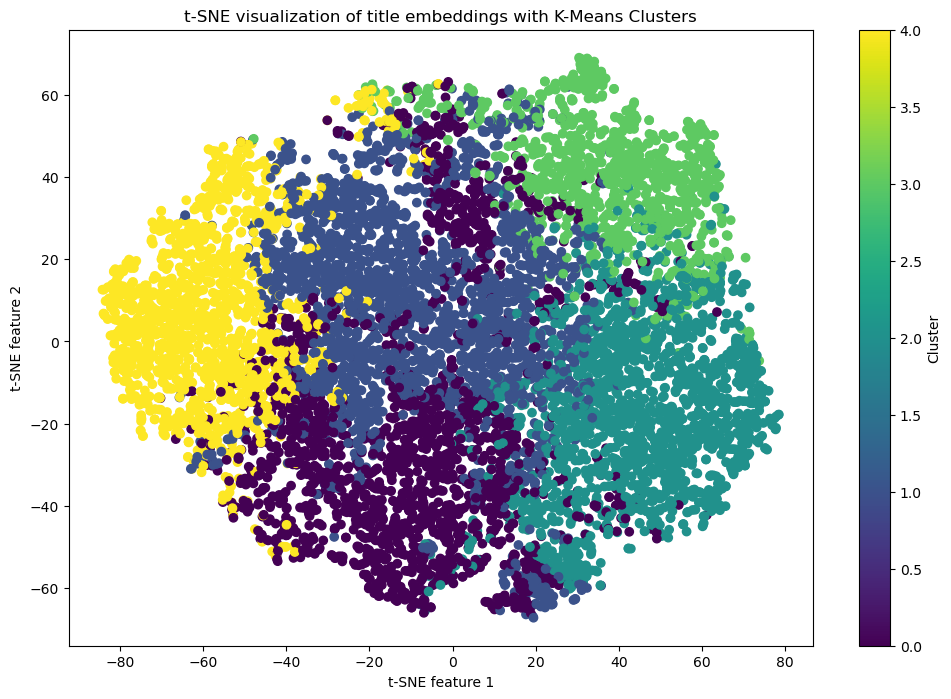

In [15]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)

vectors_tsne = tsne.fit_transform(content_vectors)

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=df['content_cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of title embeddings with K-Means Clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

The plot visualizes the clusters of text content in a 2-dimensional space, where each point represents a piece of text.
The t-SNE algorithm has reduced the high-dimensional word vectors to two dimensions, preserving the local structure and highlighting the similarities between texts.
